In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Automatically created module for IPython interactive environment


### Rahul's style ROC plot ###

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

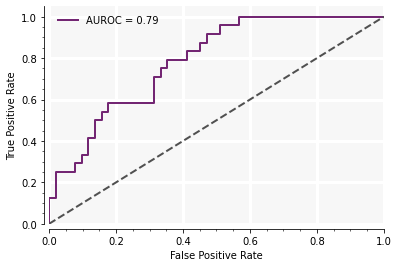

In [3]:
#plt.figure()
from sklearn.metrics import roc_curve, auc

n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
lw = 2
fig, ax = plt.subplots()
ax.plot(fpr[2], tpr[2], color='#732673',
         lw=lw, label='AUROC = %0.2f' % roc_auc[2])
ax.plot([0, 1], [0, 1], color='#505050', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('#f7f7f7')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(b=True, which='major', color='white', linestyle='-', linewidth=3.0)
#ax.grid(b=True, which='minor', color='white', linestyle='-', linewidth=1)
ax.set_axisbelow(True)
ax.legend(loc='best', frameon=False)
plt.minorticks_on()
plt.rcParams.update({'font.size': 18})
plt.show()
outfile = "test.png"
fig.savefig(outfile)
plt.close(fig)

### Rahul's style for scatter plots ###

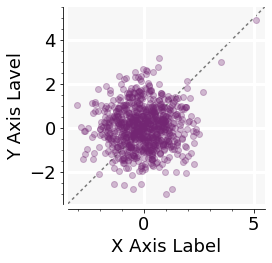

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[0], X[1], color='#732673', alpha = 0.3)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, alpha=0.75, zorder=0, color='#505050', linestyle='--', dashes = [2,2])
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#ax.set_xlim([-0.02, 1.0])
#ax.set_ylim([-0.02, 1.05])
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Lavel')
ax.set_facecolor('#f7f7f7')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(b=True, which='major', color='white', linestyle='-', linewidth=3.0)
#ax.grid(b=True, which='minor', color='white', linestyle='-', linewidth=1)
ax.set_axisbelow(True)
#ax.legend(loc='best', frameon=False)
plt.minorticks_on()
plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.show()
outfile = "test.png"
fig.savefig(outfile)
plt.close(fig)